# Evaluating classifier results

In [1]:
from evaluate_results import get_score_df, load_histo_file
from typing import List
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Paths to result files. These can be downloaded from the results folder in the project Drive folder.

If you have a different set of results, you'll want to replace these values. Then the rest of the notebook should run fine.

There's some lists of old results files commented here, for convenience of the author.

In [2]:
# RESULTS_PATHS: List[str] = [
#     "test_all_export3.csv",
#     "N_east_all.csv",
#     "N_se_h1-cc80.csv",
#     "indonesia_1_0200.csv",
#     "indonesia_2_200.csv",
#     "indonesia_2_180.csv"
# ]
# RESULTS_PATHS: List[str] = [
#     "hexas_west13_preLabels.csv",
#     "hexas_west14_pre_asc.csv",
#     "hexas_west14_pre_desc.csv",
#     "hexas_west15_jaxa.csv",
#     "hexas_west17_jaxa.csv",
#     "prg-Prelabels_12.csv",
# ]
RESULTS_PATHS: List[str] = [
    "hexas_west12.csv",
    "hexas_west11_desc300.csv",
    "hexas_west11_asc300.csv",
]
RESULTS_DIR = "results/"

Load results, expecting them to be of the form as the files listed above, in a direc.

In [3]:
results = {path: load_histo_file(RESULTS_DIR + path) for path in RESULTS_PATHS}

Now we merge the visual interpretation data in. This requires you to have the data at the appropriate path. Again, this data file can be downloaded from Drive, this time from the labels directory.

Alternatively, you can create the relevant CSVs yourself from the xlsx files provided by the client by running the scripts `xlsx_to_csv.py` and `train_test_split.py` successively.

**NB: We specifically use "training_complete.csv" because the test data is intended to be reserved only for evaluation of the system at the end of the project.**

In [4]:
labels_df = pd.read_csv("label_CSVs/training_complete.csv")

results_w_labels = dict()
for path, df in results.items():
    results_w_labels[path] = pd.merge(df, labels_df, how="inner", left_on="plotID",right_on="pl_plotid")


/home/onniaarn/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The block below prints the mean absolute errors of the different results files.

In [5]:
for path, df in results_w_labels.items():
    print(path)
    print(get_score_df(df))

hexas_west12.csv
                               MAE  Correlation  % of deforestation missed  \
% Forest Loss 2000-2010  29.293788     0.078841                  73.404255   
% Forest Loss 2010-2018  41.879305    -0.076528                  63.636364   

                         % Precision  Avg. actual  Avg. predicted  
% Forest Loss 2000-2010     0.531915    29.330544        2.768143  
% Forest Loss 2010-2018     0.774194    41.631799        0.984147  
hexas_west11_desc300.csv
                               MAE  Correlation  % of deforestation missed  \
% Forest Loss 2000-2010  25.212618     0.468760                   3.883495   
% Forest Loss 2010-2018  26.617993     0.403505                   5.714286   

                         % Precision  Avg. actual  Avg. predicted  
% Forest Loss 2000-2010     0.540984    33.651452       18.563540  
% Forest Loss 2010-2018     0.546961    31.701245       17.235753  
hexas_west11_asc300.csv
                               MAE  Correlation  % of de

## Saving the cleaned data

If you wish, you can run the block below to save the processessed results files with the proper percentages as CSVs. 

In [7]:
CLEAN_DIR = "cleaned_results/"

if not os.path.exists(CLEAN_DIR):
    os.mkdir(CLEAN_DIR)

for path, df in results_w_labels.items():
    df.to_csv(CLEAN_DIR + path)

## Visualizing results

In [7]:
total_df = pd.concat(results_w_labels.values())

First, we plot actual deforestation against deforestation according to the visual interpreters. For clarity, hexas for which there was no deforestation according to the visual interpreters are visualized separately as a histogram below.

You may want to adjust the definition of `df` below to match whatever set of results you wish to visualize.

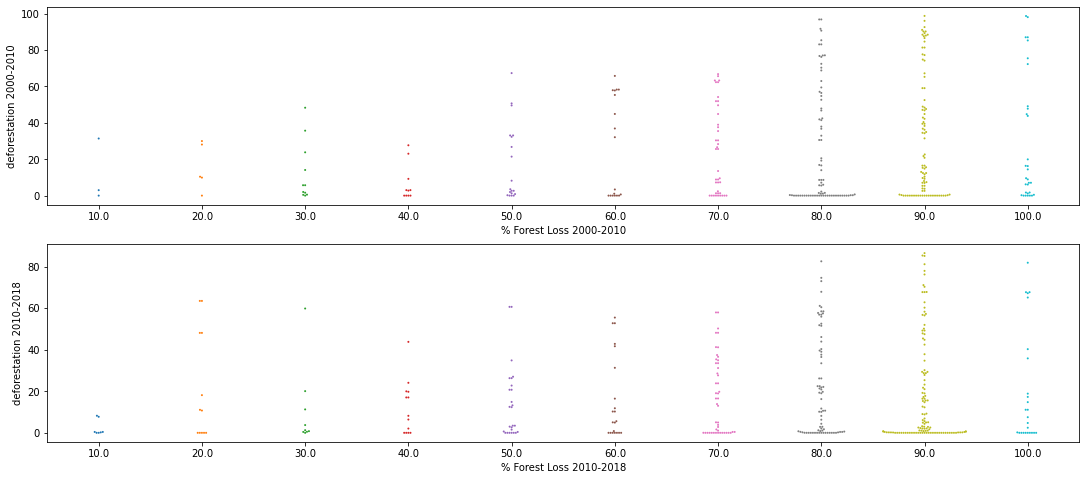

In [8]:
df = total_df
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(18.5, 8)
w_change_2000 = total_df.loc[total_df["% Forest Loss 2000-2010"] >= 10, :]
w_change_2010 = total_df.loc[total_df["% Forest Loss 2010-2018"] >= 10, :]
sns.swarmplot(x=w_change_2000["% Forest Loss 2000-2010"], y=w_change_2000["deforestation 2000-2010"], size=2, ax=axes[0])
sns.swarmplot(x=w_change_2010["% Forest Loss 2010-2018"], y=w_change_2010["deforestation 2010-2018"], size=2, ax=axes[1])
plt.show()

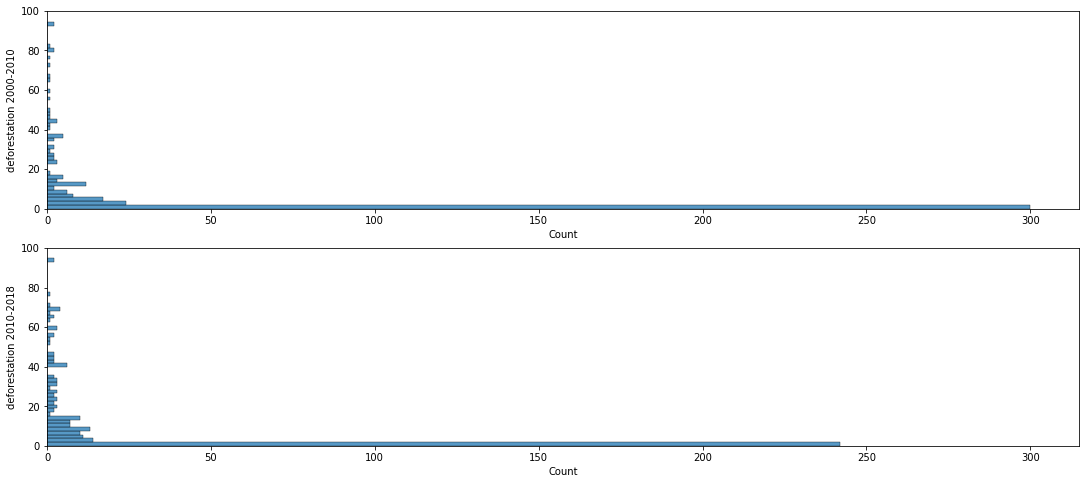

In [9]:
df = total_df
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(18.5, 8)
w_no_change_2000 = total_df.loc[total_df["% Forest Loss 2000-2010"] < 10, :]
w_no_change_2010 = total_df.loc[total_df["% Forest Loss 2010-2018"] < 10, :]
sns.histplot(y=w_no_change_2000["deforestation 2000-2010"], ax=axes[0], bins=50)
sns.histplot(y=w_no_change_2010["deforestation 2010-2018"], ax=axes[1], bins=50)
x_lim = max(axes[0].get_xlim(), axes[1].get_xlim())
y_lim = (0, 100)
axes[0].set_xlim(x_lim)
axes[0].set_ylim(y_lim)
axes[1].set_xlim(x_lim)
axes[1].set_ylim(y_lim)
plt.show()

## Stuff to be added

- What fraction deforestation was missed?
- Visualizations of where and how the model goes wrong